In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from sklearn.metrics import classification_report, confusion_matrix
import itertools 

In [43]:
IMAGE_SIZE = 180
CHANNELS = 3
img_height,img_width=180,180
batch_size=32

In [3]:
# import splitfolders

# data_dir = 'C:/Users/srisu/Downloads/archive/PlantVillage/'
# splitfolders.ratio(data_dir, seed=1337, output="Dataset", ratio=(0.8, 0.1, 0.1))


In [4]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
        'C:/Users/srisu/Downloads/Dataset/train/',
        seed=123,
        label_mode = 'categorical',
        image_size=(img_height, img_width),
        batch_size=batch_size)

Found 16504 files belonging to 15 classes.


In [5]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
        'C:/Users/srisu/Downloads/Dataset/val/',
        seed=123,
        label_mode = 'categorical',
        image_size=(img_height, img_width),
        batch_size=batch_size)

Found 2058 files belonging to 15 classes.


In [6]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
        'C:/Users/srisu/Downloads/Dataset/test/',
        seed=123,
        label_mode = 'categorical',
        image_size=(img_height, img_width),
        batch_size=batch_size)

Found 2076 files belonging to 15 classes.


In [7]:
class_names = train_ds.class_names

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [8]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=15,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(15, activation='softmax'))
  



94765736/94765736 [==============================] - 2s 0us/step


In [9]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrap  (None, 2048)              0         
 per)                                                            
                                                                 
 module_wrapper_1 (ModuleWr  (None, 512)               1049088   
 apper)                                                          
                                                                 
 module_wrapper_2 (ModuleWr  (None, 15)                7695      
 apper)                                                          
                                                                 
Total params: 24644495 (94.01 MB)
Trainable params: 1056783 (4.03 MB)
Non-trainable params: 23587712 (89.98 MB)
__________

In [10]:
resnet_model.compile(optimizer='adam',loss='categorical_crossentropy',
                     metrics=['accuracy'])

In [44]:
epochs=10
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


516/516 [==============================] - 880s 2s/step - loss: 0.1821 - accuracy: 0.9369 - val_loss: 0.1980 - val_accuracy: 0.9310
Epoch 2/10
516/516 [==============================] - 894s 2s/step - loss: 0.1142 - accuracy: 0.9608 - val_loss: 0.1732 - val_accuracy: 0.9412
Epoch 3/10
516/516 [==============================] - 893s 2s/step - loss: 0.0868 - accuracy: 0.9707 - val_loss: 0.2048 - val_accuracy: 0.9373
Epoch 4/10
516/516 [==============================] - 893s 2s/step - loss: 0.0703 - accuracy: 0.9770 - val_loss: 0.1858 - val_accuracy: 0.9436
Epoch 5/10
516/516 [==============================] - 892s 2s/step - loss: 0.0614 - accuracy: 0.9783 - val_loss: 0.1949 - val_accuracy: 0.9368
Epoch 6/10
516/516 [==============================] - 890s 2s/step - loss: 0.0581 - accuracy: 0.9797 - val_loss: 0.2017 - val_accuracy: 0.9393
Epoch 7/10
516/516 [==============================] - 894s 2s/step - loss: 0.0550 - accuracy: 0.9812 - val_loss: 0.2529 - val_accuracy: 0.9368
Epoch 8/10

In [45]:
scores = resnet_model.evaluate(test_ds)

65/65 [==============================] - 85s 1s/step - loss: 0.2789 - accuracy: 0.9417


In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

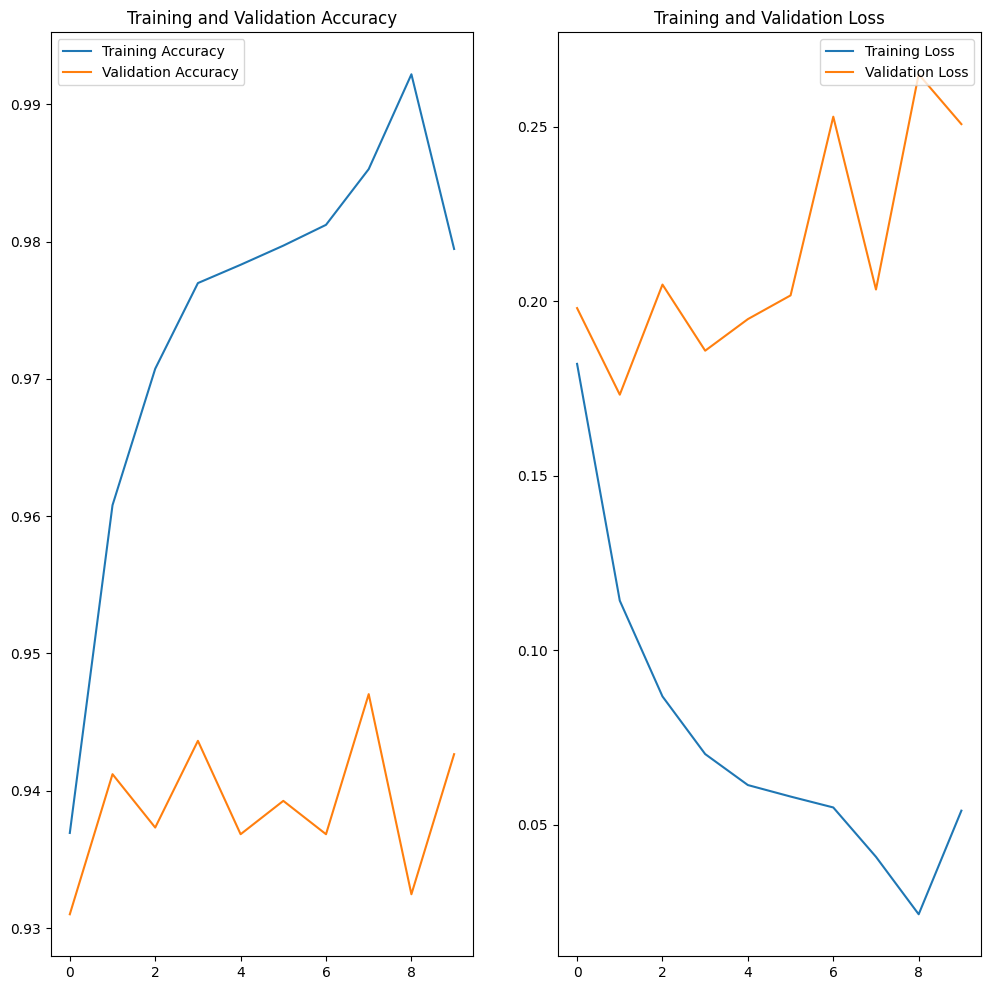

In [64]:
EPOCHS = 10

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [48]:
tlabels= []
plabels = []

for image_batch, label_batch in test_ds:
    for i in range(0, len(image_batch)):
        first_image = image_batch[i].numpy().astype('uint8')
    #     first_label = int(label_batch[0])        
        print("first image to predict  ", first_image.shape)
        #plt.imshow(first_image)
        print("actual label:", class_names[np.argmax(label_batch[i])])
        tlabels.append(np.argmax(label_batch[i]))
        batch_prediction = resnet_model.predict(image_batch)
    #     batch_prediction = resnet_model.predict([[first_image]])
        print("predicted label:", class_names[np.argmax(batch_prediction[i])])
        plabels.append(np.argmax(batch_prediction[i]))
        

first image to predict   (180, 180, 3)
actual label: Tomato_healthy
1/1 [==============================] - 1s 1s/step
predicted label: Tomato_healthy
first image to predict   (180, 180, 3)
actual label: Tomato_Spider_mites_Two_spotted_spider_mite
1/1 [==============================] - 1s 1s/step
predicted label: Tomato_Spider_mites_Two_spotted_spider_mite
first image to predict   (180, 180, 3)
actual label: Tomato_Bacterial_spot
1/1 [==============================] - 1s 1s/step
predicted label: Tomato_Bacterial_spot
first image to predict   (180, 180, 3)
actual label: Tomato_Spider_mites_Two_spotted_spider_mite
1/1 [==============================] - 1s 1s/step
predicted label: Tomato_Spider_mites_Two_spotted_spider_mite
first image to predict   (180, 180, 3)
actual label: Pepper__bell___healthy
1/1 [==============================] - 1s 1s/step
predicted label: Pepper__bell___healthy
first image to predict   (180, 180, 3)
actual label: Tomato_Late_blight
1/1 [===========================

Confusion Matrix
Normalized confusion matrix
Classification Report
                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       0.99      0.94      0.96       101
                     Pepper__bell___healthy       0.98      0.99      0.99       149
                      Potato___Early_blight       0.99      0.99      0.99       100
                       Potato___Late_blight       0.96      0.87      0.91       100
                           Potato___healthy       0.74      0.88      0.80        16
                      Tomato_Bacterial_spot       1.00      0.95      0.97       214
                        Tomato_Early_blight       0.95      0.80      0.87       100
                         Tomato_Late_blight       0.92      0.92      0.92       192
                           Tomato_Leaf_Mold       0.93      0.97      0.95        96
                  Tomato_Septoria_leaf_spot       0.97      0.88      0.92       1

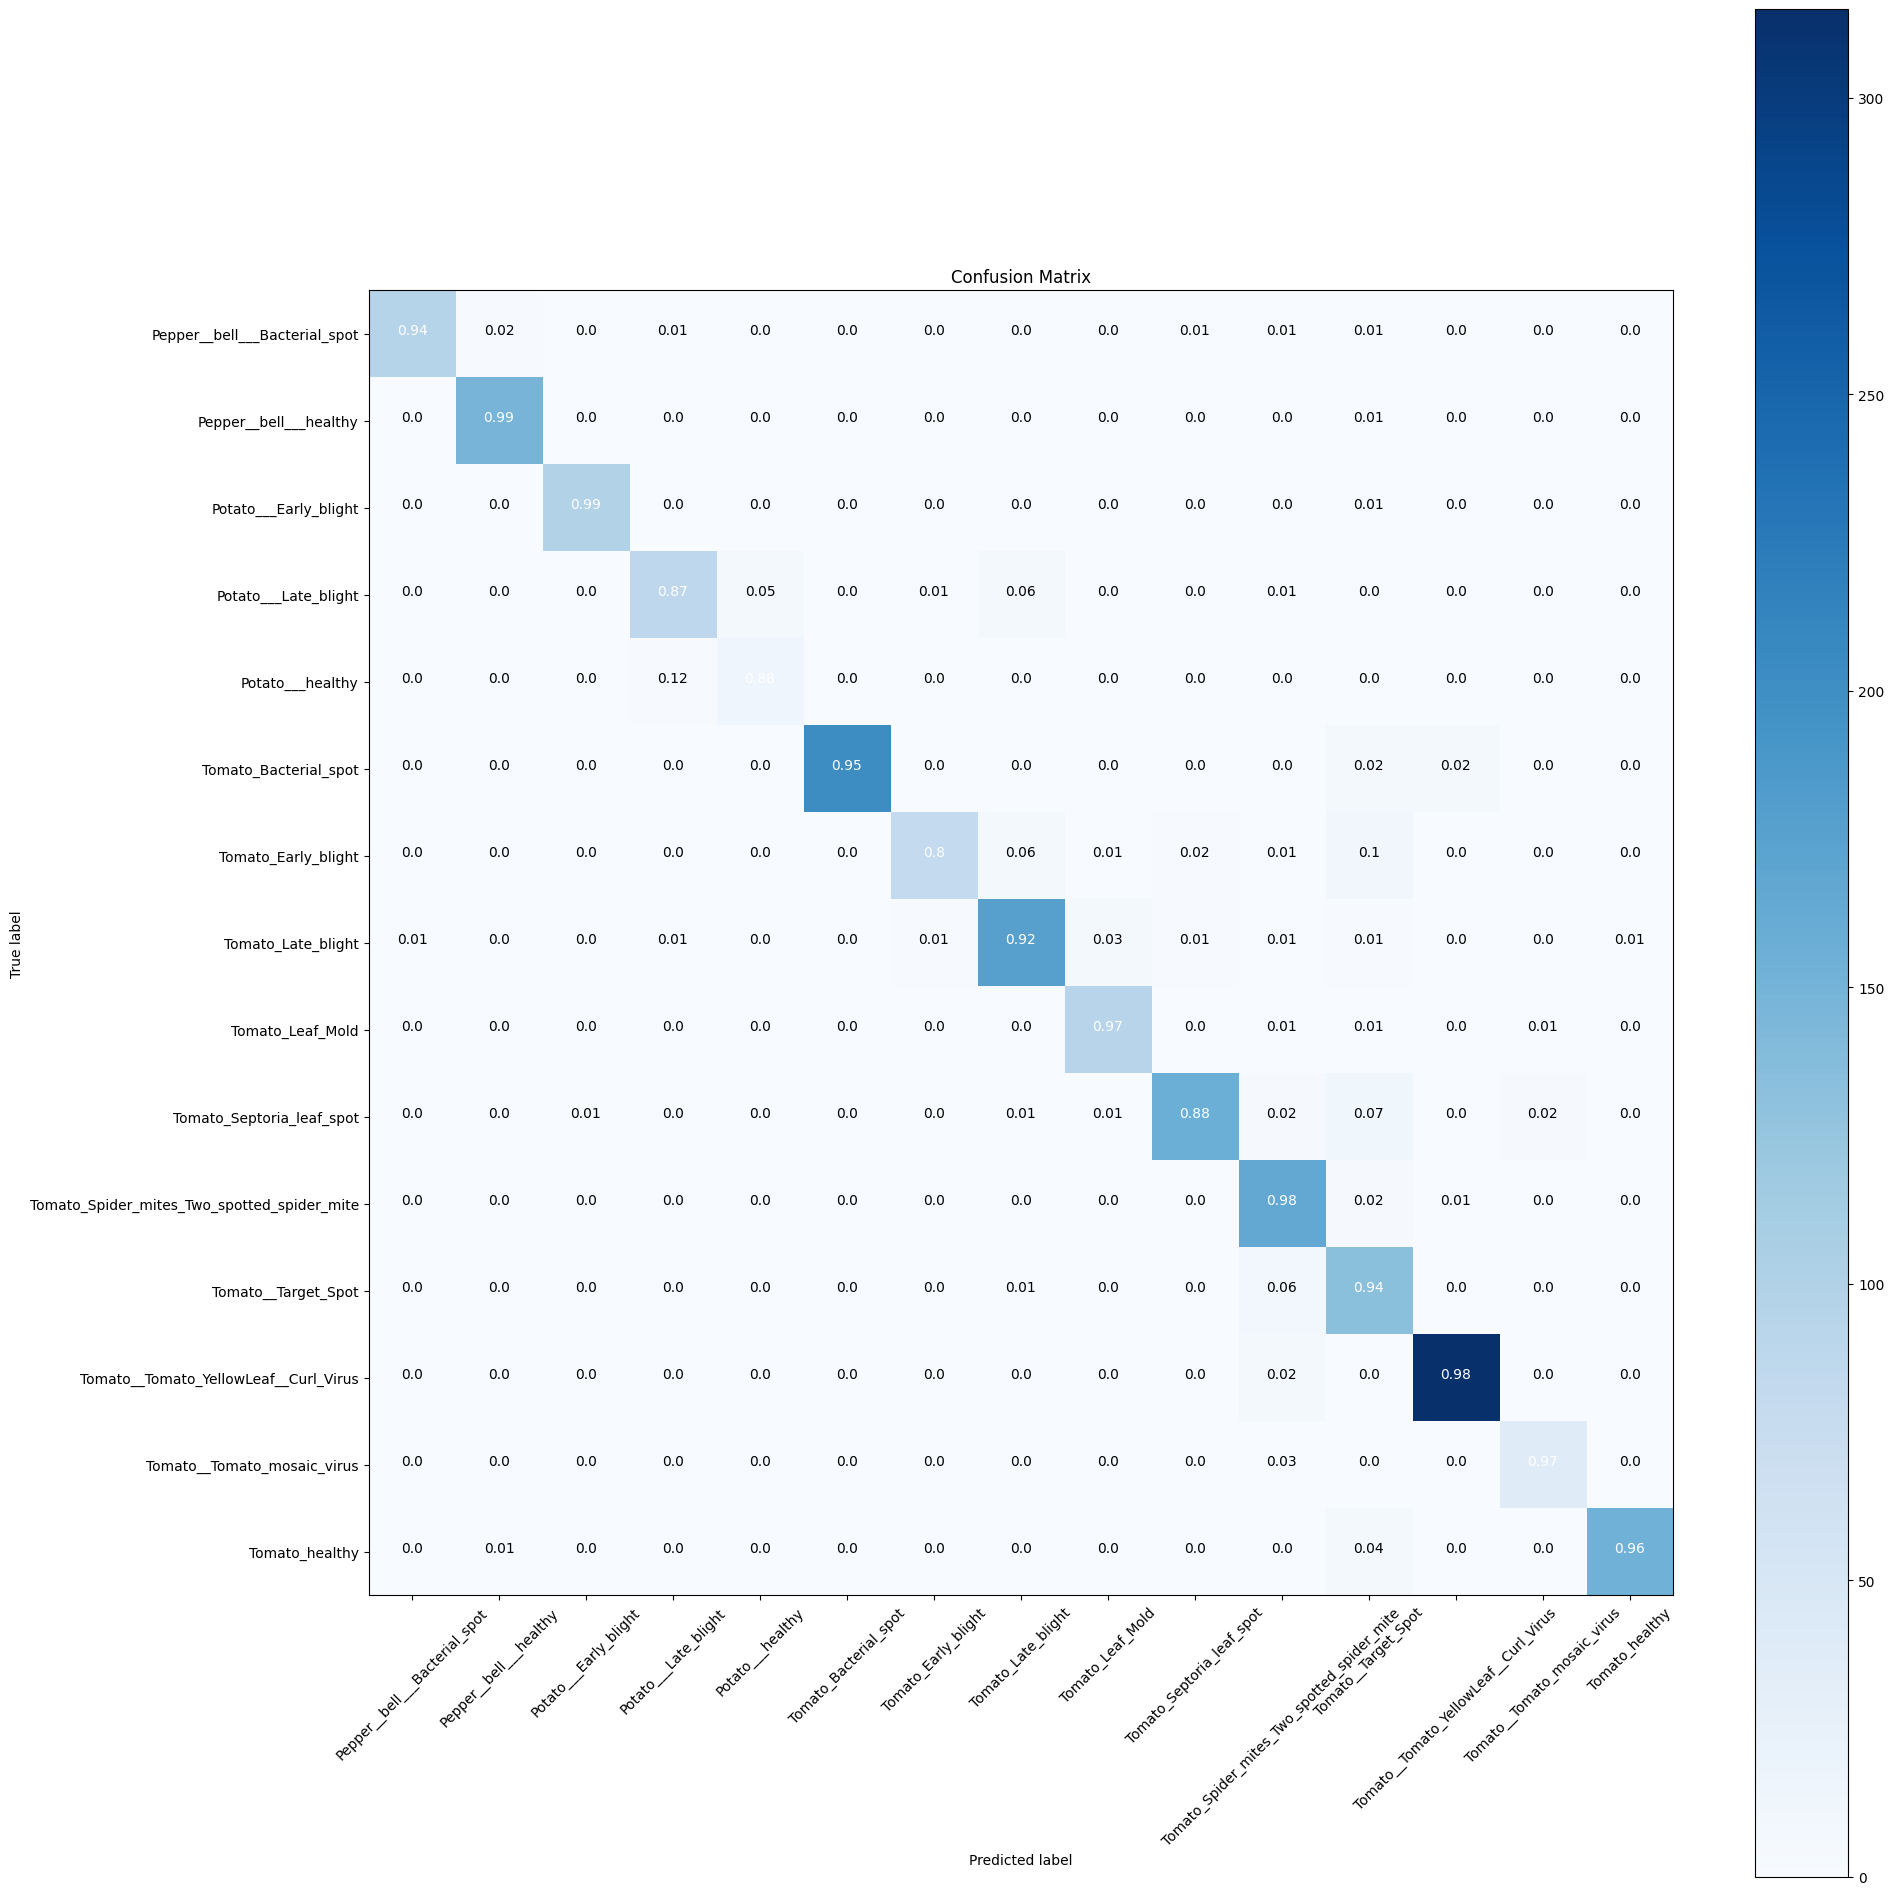

In [55]:
#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(20,20))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#Print the Target names


#Confution Matrix
print('Confusion Matrix')
cm = confusion_matrix(tlabels, plabels)
plot_confusion_matrix(cm, class_names, title='Confusion Matrix')
#Print Classification Report
print('Classification Report')
print(classification_report(tlabels, plabels, target_names=class_names))

In [58]:
true_cat = tf.concat([y for x,y in test_ds], axis=0)
test_data = tf.concat([x for x,y in test_ds], axis=0)

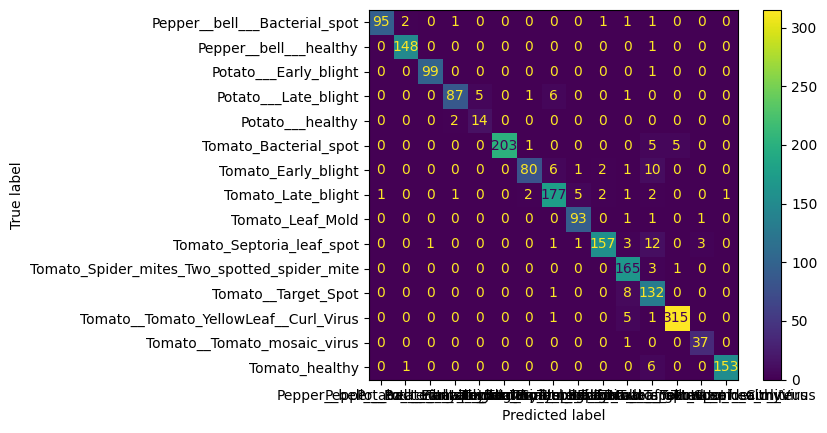

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

newcm = confusion_matrix(tlabels, plabels )
disp = ConfusionMatrixDisplay(confusion_matrix=newcm,
                              display_labels=class_names)
disp.plot()
plt.show()

In [49]:
resnet_model.save("/Users/nareshkalluri/Downloads/archive/plantdisease.h5")

In [56]:
resnet_model.save_weights("model_wts.h5")

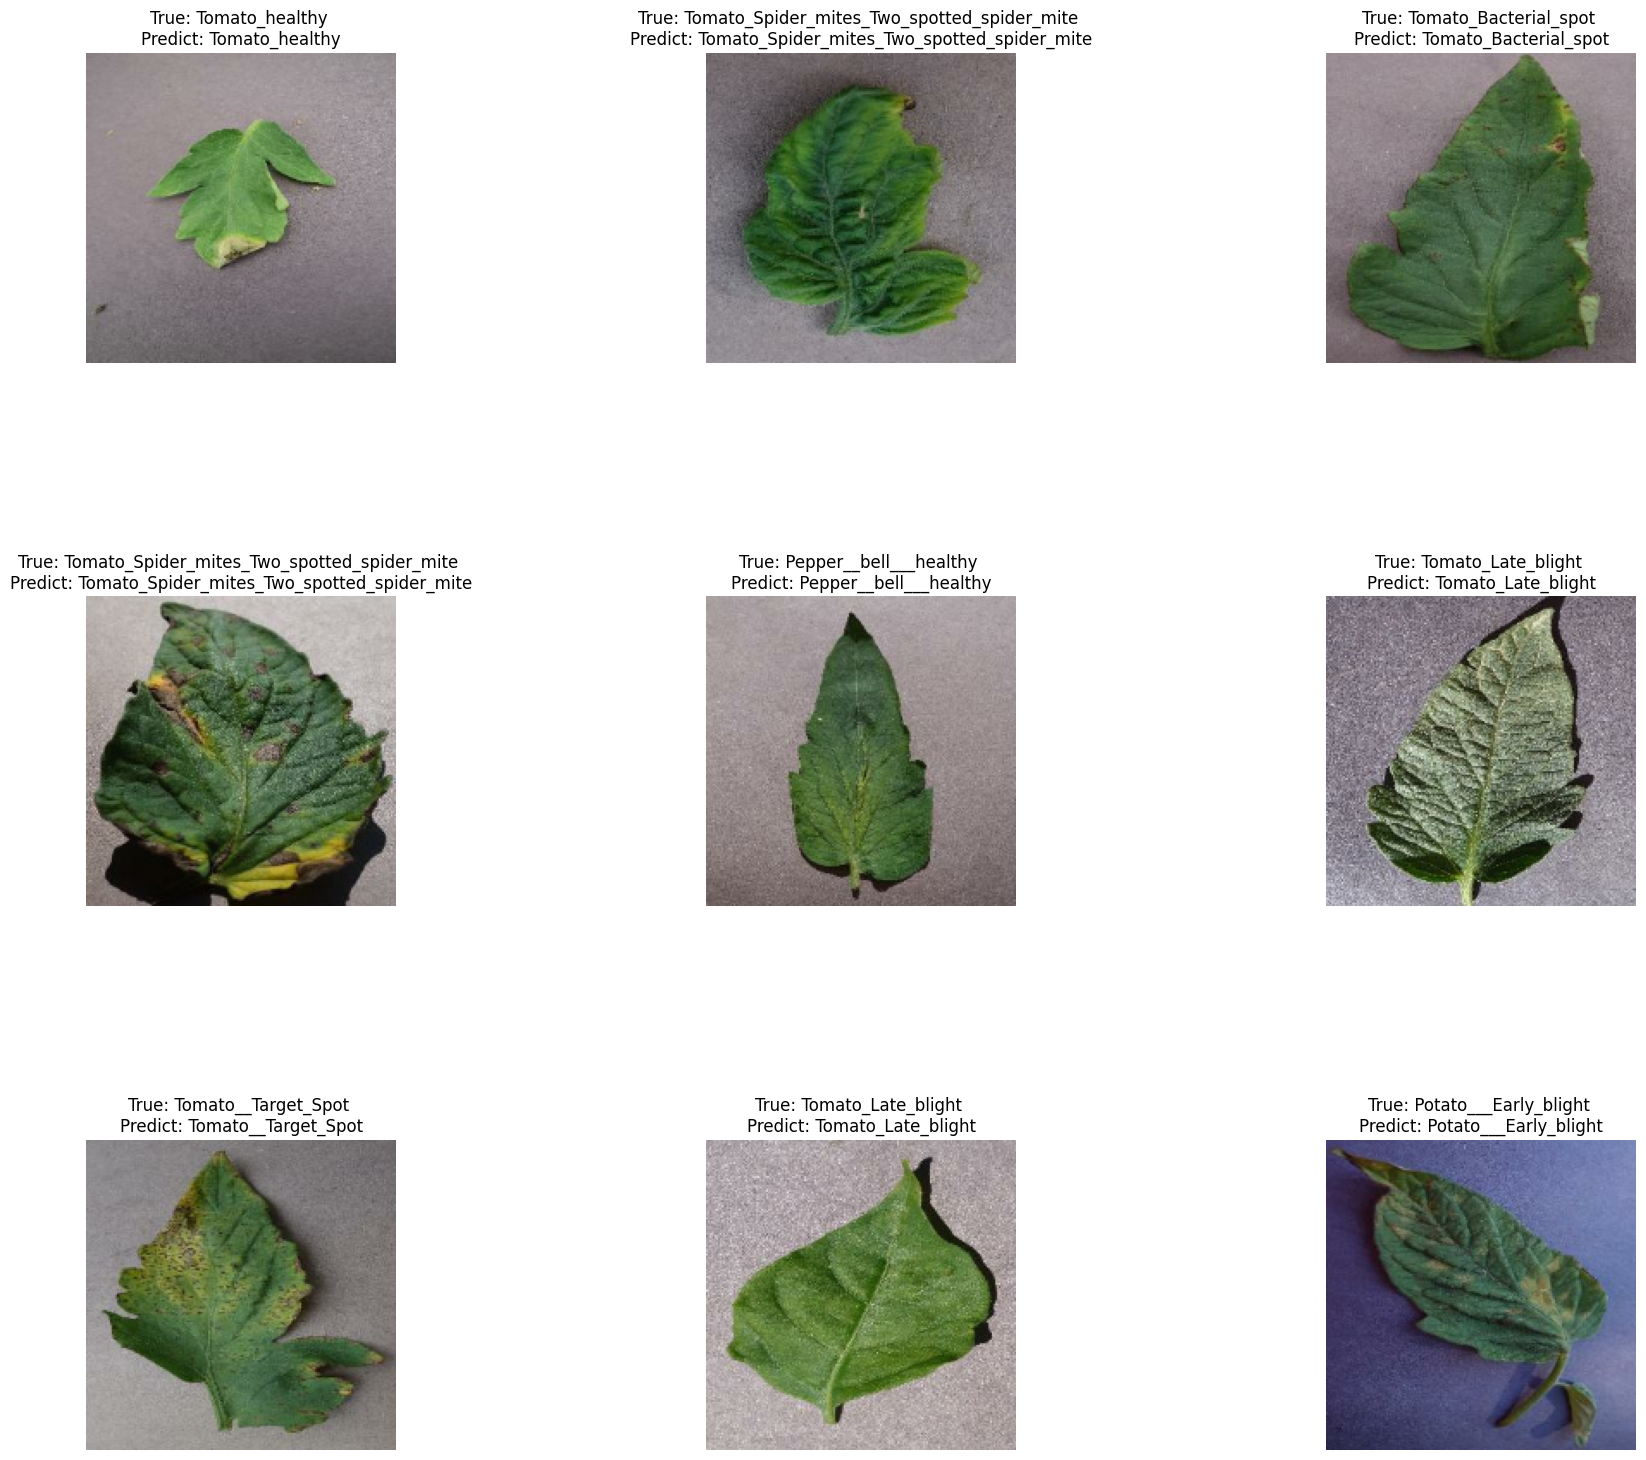

In [63]:
fig, axes = plt.subplots(3, 3, figsize=(20,20))
axes = axes.ravel()
for i in np.arange(0, 9):
    axes[i].imshow(test_data[i].numpy().astype('uint8'))
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[tlabels[i]], class_names[plabels[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)
